In [221]:
import pandas as pd# Importing tabs as separate dataframes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpl
from scipy import stats

# Does the Test Prep Course Improve Test Scores 

## Merging Tables

In [222]:
# Importing tabs as separate dataframes
NewYork = pd.read_excel(r'C:\Users\Ron\Documents\St Lawrence\Business Analytics\Semester 1\Analytic Programming ADMN 5018\dataset from Ahsan.xlsx',skiprows = 10,sheet_name = 'Newyork City Dataset')
Albany = pd.read_excel(r'C:\Users\Ron\Documents\St Lawrence\Business Analytics\Semester 1\Analytic Programming ADMN 5018\dataset from Ahsan.xlsx',skiprows = 2,sheet_name = 'Albany Dataset')


In [223]:
# Creating 'City' column.

Albany['City']='Albany'
NewYork['City']='NYC'

In [224]:
# deleting "Agencey Location" that had only one element in each

AL=Albany.drop(columns='Agency Location')
NY=NewYork.drop(columns='Agency Location')
NY.columns #shows columns in NY to see where the spaces are and to compare to the columns in AL

Index(['Student Code', 'race/ethnicity (self declared on form)',
       '   parental level of education   ', 'lunch',
       'test preparation course     ', '     Math score revised',
       'reading Score', 'writing score', 'Math Test Exemption Date', 'City'],
      dtype='object')

### Making Column Headers equal in both Tables

In [225]:
# spaces eliminated, all letters to no caps, shorten some others

NY=NY.rename(columns={'lunch':'Lunch','   parental level of education   ':'Parent Ed',
                  'race/ethnicity (self declared on form)':'Race/Ethnicity',
                   'test preparation course     ':'Test Prep',
                   '     Math score revised':'Math Score',
                  'writing score':'Writing Score',
                  'reading Score':'Reading Score'})
AL.columns

Index(['Student Code', 'race/ethnicity', 'Parental level of education',
       'lunch ', 'test preparation course', '     math score revised',
       'reading Score', 'writing score  ', 'Math Test Exemption Date', 'City'],
      dtype='object')

In [226]:
# spaces eliminated, all letters to no caps, shorten some others. Make AL.columns = to NY.columns

AL=AL.rename(columns={'lunch ':'Lunch','Parental level of education':'Parent Ed',
                  'race/ethnicity':'Race/Ethnicity',
                   'test preparation course':'Test Prep',
                   '     math score revised':'Math Score',
                  'writing score  ':'Writing Score',
                  'reading Score':'Reading Score'})


### Actual merging of two datasets into CleanSDF

In [227]:
# Merge Tables NY and AL into CleanSDF

frames=[NY,AL]
CleanSDF=pd.concat(frames, sort=False)

## Establishing and populate Gender column

In [228]:
#Convert 'Student Code' from numeric to string

CleanSDF['Student Code']=CleanSDF['Student Code'].astype(str)


In [229]:
# Create Genter Column, set all values to 'male'

CleanSDF['Gender']='male'


In [230]:
# Where the last Character in Student Code = 2, change Genger to 'female'

i=0
for x in CleanSDF['Student Code']:  #last digit in Student Code: 1 = male
    if x.endswith('2'):
        CleanSDF.iloc[i,10]='female'
        #print (x)
    i=i+1


## Establish and calculate Average Score column

In [231]:
# Creat Avg Score column, set to 0

CleanSDF['Avg Score']=0

### Change letter scores of 'F' to arbitrarily chosen numberic score of 45

In [232]:
# Change scores of 'F' in Math Score to 45.

i=0
for x in CleanSDF['Math Score']:  # change F to score of 45
    if x=='F':
        CleanSDF.iloc[i,5]=45
    i=i+1

In [233]:
# Change scores of 'F' in Writing Score to 45.

i=0
for x in CleanSDF['Writing Score']:  
    if x=='F':
        CleanSDF.iloc[i,7]=45
    i=i+1


In [234]:
# Change scores of 'F' in Reading Score to 45.

i=0
for x in CleanSDF['Reading Score']:  
    if x=='F':
        CleanSDF.iloc[i,6]=45
        #print(CleanSDF.iloc[i,7])
    i=i+1


In [235]:
# Calculate average over all scores. Do not include Math Score if Exempt. ie if Math Exemption Date not null.

i=0
for x in CleanSDF['Math Test Exemption Date']:  #checks to see if the there is a date os exemption
    if pd.notnull(x):
        CleanSDF.iloc[i,11]=(CleanSDF.iloc[i,6]+CleanSDF.iloc[i,7])/2 # if True, find average of Reading and Writing
    else:
        CleanSDF.iloc[i,11]=(CleanSDF.iloc[i,5]+CleanSDF.iloc[i,6]+CleanSDF.iloc[i,7])/3 # if not, use all three scores in average
    i=i+1

  


## Meta Data

In [236]:
CleanSDF.dtypes #columns names and datatype


Student Code                 object
Race/Ethnicity               object
Parent Ed                    object
Lunch                        object
Test Prep                    object
Math Score                   object
Reading Score                 int64
Writing Score                 int64
Math Test Exemption Date     object
City                         object
Gender                       object
Avg Score                   float64
dtype: object

In [237]:
# Math Score Type object due to blanks where no score due to exemption.
i=0
for x in CleanSDF['Math Test Exemption Date']:  #checks to see if the there is a date os exemption
    if pd.notnull(x):
        CleanSDF.iloc[i,5]=0 # sets element with no score or blanks to 0
    i=i+1
CleanSDF.dtypes #columns names and datatype to ensure Math Score int64

Student Code                 object
Race/Ethnicity               object
Parent Ed                    object
Lunch                        object
Test Prep                    object
Math Score                    int64
Reading Score                 int64
Writing Score                 int64
Math Test Exemption Date     object
City                         object
Gender                       object
Avg Score                   float64
dtype: object

In [238]:
#lenght of dataframe 
len(CleanSDF)

1466

In [239]:
#number of values per column
CleanSDF.count()

Student Code                1466
Race/Ethnicity               401
Parent Ed                   1466
Lunch                       1466
Test Prep                   1466
Math Score                  1466
Reading Score               1466
Writing Score               1466
Math Test Exemption Date      55
City                        1466
Gender                      1466
Avg Score                   1466
dtype: int64

In [240]:
CleanSDF.shape

(1466, 12)

In [241]:
info_return = CleanSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 465
Data columns (total 12 columns):
Student Code                1466 non-null object
Race/Ethnicity              401 non-null object
Parent Ed                   1466 non-null object
Lunch                       1466 non-null object
Test Prep                   1466 non-null object
Math Score                  1466 non-null int64
Reading Score               1466 non-null int64
Writing Score               1466 non-null int64
Math Test Exemption Date    55 non-null object
City                        1466 non-null object
Gender                      1466 non-null object
Avg Score                   1466 non-null float64
dtypes: float64(1), int64(3), object(8)
memory usage: 188.9+ KB


In [242]:
#Return objects of info and count methods 
count_return = CleanSDF.count().tail()
count_return

Writing Score               1466
Math Test Exemption Date      55
City                        1466
Gender                      1466
Avg Score                   1466
dtype: int64

In [243]:
#isna method returns a dataframe of all true/false values 
CleanSDF_missing = CleanSDF.isna()
CleanSDF_missing.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [244]:
#Summing a boolean dataframe 
CleanSDF_num_missing = CleanSDF_missing.sum()
CleanSDF_num_missing

#only Race and Math Test Exempt with missing data. As we are not considering race and we
# we are accounting for Math exemption, this represents no problem

Student Code                   0
Race/Ethnicity              1065
Parent Ed                      0
Lunch                          0
Test Prep                      0
Math Score                     0
Reading Score                  0
Writing Score                  0
Math Test Exemption Date    1411
City                           0
Gender                         0
Avg Score                      0
dtype: int64

In [245]:
#Number rows in dataset 
len(CleanSDF)

1466

# Clean up Parent Ed. Values are inconsistant

In [246]:
# strip spaces from Parent Ed column
i=0
for x in CleanSDF['Parent Ed']:  
    CleanSDF.iloc[i,2]=CleanSDF.iloc[i,2].strip()
    i=i+1


In [247]:
# modify strings in Perent Ed column to eliminate duplicats with capital letters
i=0
for x in CleanSDF['Parent Ed']:
    if CleanSDF.iloc[i,2]=="Associate's degree":
        CleanSDF.iloc[i,2]="associate's degree"
    if CleanSDF.iloc[i,2]=="High school":
        CleanSDF.iloc[i,2]="high school"
    if CleanSDF.iloc[i,2]=="some High school":
        CleanSDF.iloc[i,2]="some high school"
    if CleanSDF.iloc[i,2]=="Some college":
        CleanSDF.iloc[i,2]="some college"
    if CleanSDF.iloc[i,2]=="Master's degree":
        CleanSDF.iloc[i,2]="master's degree"
    if CleanSDF.iloc[i,2]=="unknwon":
        CleanSDF.iloc[i,2]='unknown'
    if CleanSDF.iloc[i,2]=="":
        CleanSDF.iloc[i,2]='unknown'
    i=i+1

In [248]:
#Test to ensure no similarly names values

CleanSDF.groupby('Parent Ed')['Avg Score'].count()

Parent Ed
associate's degree    315
bachelor's degree     172
high school           300
master's degree        87
some college          328
some high school      259
unknown                 5
Name: Avg Score, dtype: int64

In [249]:
# merge Parent Ed into three levels for convenience

i=0
for x in CleanSDF['Parent Ed']:
    if CleanSDF.iloc[i,2]=="associate's degree":
        CleanSDF.iloc[i,2]='Level 2'
    if CleanSDF.iloc[i,2]=="high school":
        CleanSDF.iloc[i,2]="Level 1"
    if CleanSDF.iloc[i,2]=="some high school":
        CleanSDF.iloc[i,2]="Level 1"
    if CleanSDF.iloc[i,2]=="some college":
        CleanSDF.iloc[i,2]="Level 2"
    if CleanSDF.iloc[i,2]=="master's degree":
        CleanSDF.iloc[i,2]="Level 3"
    if CleanSDF.iloc[i,2]=="bachelor's degree":
        CleanSDF.iloc[i,2]='Level 3'
    if CleanSDF.iloc[i,2]=="unknown":
        CleanSDF.iloc[i,2]='Level 1'  # rename 'unknown' as there are only 5, class as Level 1 Parent Ed
    i=i+1
    
CleanSDF.groupby('Parent Ed')['Avg Score'].count() #ensure all values changed  

Parent Ed
Level 1    564
Level 2    643
Level 3    259
Name: Avg Score, dtype: int64

# Graphs

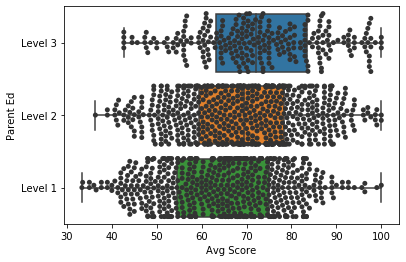

In [250]:
ax = sns.boxplot(y="Parent Ed", x="Avg Score", data=CleanSDF)
ax = sns.swarmplot(y="Parent Ed", x="Avg Score", data=CleanSDF, color=".2")

Text(0, 0.5, 'Parent Ed')

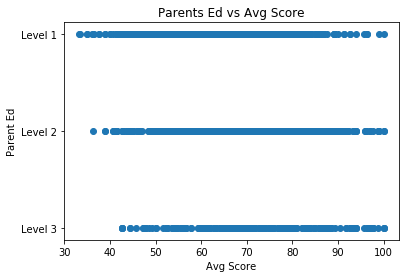

In [251]:
#create figure and axis. Avg score vs Pareent Ed 
fig, ax = plt.subplots()

#Scatter 
ax.scatter(CleanSDF['Avg Score'], CleanSDF['Parent Ed'])

#Title and Labels
ax.set_title('Parents Ed vs Avg Score')
ax.set_xlabel('Avg Score')
ax.set_ylabel('Parent Ed')

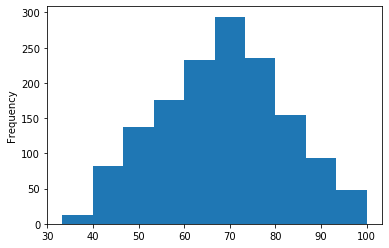

In [252]:
#histogram of Avg Score
CleanSDF['Avg Score'].plot.hist()

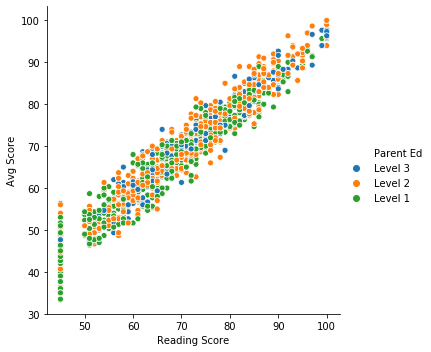

In [253]:
#Scatter plot of Reading vs Avg Score to see correlation.
sns.relplot(x='Reading Score',y='Avg Score',data=CleanSDF,hue='Parent Ed')

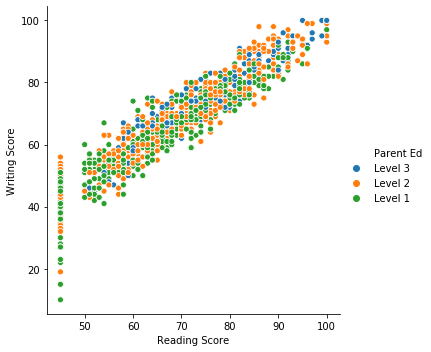

In [254]:
#Scatter plot of Reading vs Writing Score to see correlation.
sns.relplot(x='Reading Score',y='Writing Score',data=CleanSDF,hue='Parent Ed')

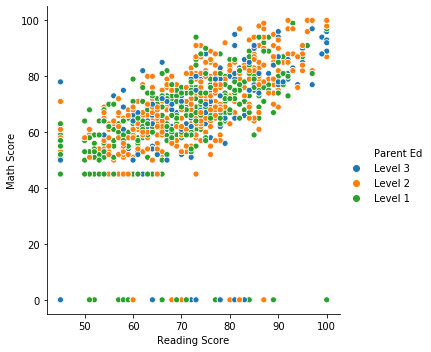

In [255]:
#Scatter plot of Math vs Reading score. Less correlaton than Reading and Avg
sns.relplot(x='Reading Score',y='Math Score',data=CleanSDF,hue='Parent Ed')

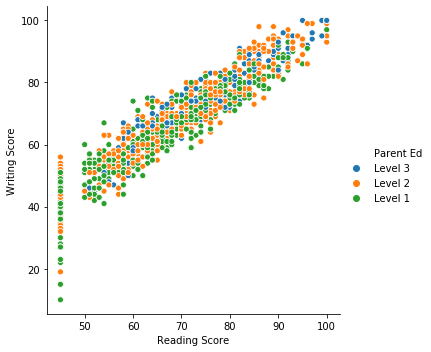

In [256]:
#Scatter plot of Writing vs Reading score. high correlaton than Reading and Avg
sns.relplot(x='Reading Score',y='Writing Score',data=CleanSDF,hue='Parent Ed')

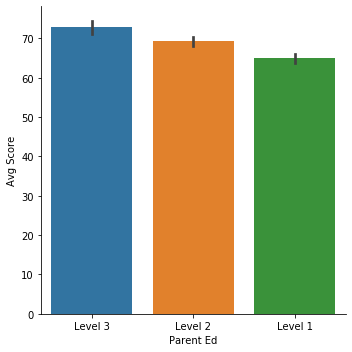

In [257]:
sns.catplot(x='Parent Ed',y='Avg Score', kind='bar',data=CleanSDF,estimator=np.mean)

## Find statistical means and standard deviations on various groupings

In [258]:
#find means of Avg Score gouped by whether the student completed the test prep course or not and by Parent Ed.

meansParEdTestPrep=CleanSDF.groupby(['Parent Ed','Test Prep'])['Avg Score'].mean()
meansParEdTestPrep

Parent Ed  Test Prep
Level 1    completed    69.193069
           none         62.627072
Level 2    completed    74.438137
           none         66.409420
Level 3    completed    77.130952
           none         70.269151
Name: Avg Score, dtype: float64

In [259]:
# Standard Deviation of Avg Score grouped by Parent Ed and Test Prep

sdParEdTestPrep=CleanSDF.groupby(['Parent Ed','Test Prep'])['Avg Score'].std()
sdParEdTestPrep

Parent Ed  Test Prep
Level 1    completed    12.933788
           none         12.726566
Level 2    completed    11.810318
           none         13.037251
Level 3    completed    13.226640
           none         13.538321
Name: Avg Score, dtype: float64

In [260]:
numParEdTestPrep=CleanSDF.groupby(['Parent Ed','Test Prep'])['Avg Score'].count()
numParEdTestPrep

Parent Ed  Test Prep
Level 1    completed    202
           none         362
Level 2    completed    229
           none         414
Level 3    completed     98
           none         161
Name: Avg Score, dtype: int64

In [261]:
# mean of Avg Score grouped by Gender and Test Prep

meansGenTestPrep=CleanSDF.groupby(['Gender','Test Prep'])['Avg Score'].mean()
meansGenTestPrep

Gender  Test Prep
female  completed    74.314217
        none         67.535762
male    completed    71.394000
        none         63.465388
Name: Avg Score, dtype: float64

In [262]:
# Standard Deviation of Avg Score grouped by Gender and Test Prep

sdGenTestPrep=CleanSDF.groupby(['Gender','Test Prep'])['Avg Score'].std()
sdGenTestPrep


Gender  Test Prep
female  completed    12.442130
        none         13.626347
male    completed    13.187903
        none         12.545390
Name: Avg Score, dtype: float64

In [263]:
numGenTestPrep=CleanSDF.groupby(['Gender','Test Prep'])['Avg Score'].count()
numGenTestPrep

Gender  Test Prep
female  completed    279
        none         494
male    completed    250
        none         443
Name: Avg Score, dtype: int64

In [264]:
#mean Avg Score by City 

meanCityTestPrep=CleanSDF.groupby('City')['Avg Score'].mean()
meanCityTestPrep
#very little difference

City
Albany    68.670243
NYC       68.059667
Name: Avg Score, dtype: float64

In [265]:
# Standard deviation of Avg Score by City 

sdCityTestPrep=CleanSDF.groupby('City')['Avg Score'].std()
sdCityTestPrep
#very little difference

City
Albany    13.595869
NYC       13.589817
Name: Avg Score, dtype: float64

In [266]:
# mean Average Scores by whether they took the test prep course or not

meanTestPrep=CleanSDF.groupby('Test Prep')['Avg Score'].mean()
meanTestPrep

Test Prep
completed    72.934152
none         65.611348
Name: Avg Score, dtype: float64

In [267]:
numTestPrep=CleanSDF.groupby('Test Prep')['Avg Score'].count()
numTestPrep

Test Prep
completed    529
none         937
Name: Avg Score, dtype: int64

In [268]:
#Standard deviation of of Avg Score by Test Prep
sdTestPrep=CleanSDF.groupby('Test Prep')['Avg Score'].std() #Standard Deviation
sdSqTestPrep = sdTestPrep**2
sdTestPrep

Test Prep
completed    12.870781
none         13.276056
Name: Avg Score, dtype: float64

## t test whether those who completed the test prep course had higher Avg Score than those who did not

In [269]:
# t-test on two independent groups: Whether the student completed the Test Prep Course or not.

NTestPrep=CleanSDF.groupby('Test Prep')['Avg Score'].count()
n1TestPrep=NTestPrep[0]+NTestPrep[1] # n1+n2
n2TestPrep=(1/NTestPrep[0]+1/NTestPrep[1]) # (1/n1+1/n2)
s1TestPrep=((NTestPrep[0]-1)*sdSqTestPrep[0]+(NTestPrep[1]-1)*sdSqTestPrep[1])/(n1TestPrep-2) #(n1-1)*sq(var1)+(n2-1)*sq(var2)/(n1+n2-2)
s2TestPrep=np.sqrt(s1TestPrep*(n2TestPrep)) # denominator of t-test
tTestPrep=(meanTestPrep[0]-meanTestPrep[1])/s2TestPrep # t-test statistic: difference of mean divided by denominator
tTestPrep # Student t value

10.254139706388923

In [270]:
#one-tail t-test

pTestPrep=1 - stats.t.cdf(tTestPrep,df=(n1TestPrep-2))
pTestPrep

0.0

## We can conclude that those who took the test prep course out performed those who did not with a 100% degree of confidence

## test of t-Test with data from page 159 of Stats binder. This is a test of the above formula. I am inserting numbers from a given example for which I know the answer. Test works

In [271]:

n1TestPrep=62+18 # n1+n2
n2TestPrep=(1/18+1/62) # (1/n1+1/n2)
s1TestPrep=((18-1)*1.742885**2+(62-1)*1.902293**2)/(62+18-2) #(n1-1)*sq(var1)+(n2-1)*sq(var2)/(n1+n2-2)
s2TestPrep=np.sqrt(s1TestPrep*(n2TestPrep)) # denominator of t-test
tTestPrep=(9.633333-10.3354)/s2TestPrep # t-test statistic: difference of mean divided by denominator
tTestPrep # Student t value

-1.403213897997782

# Below is a cheat of sorts. It is lines of code I did today, Sunday, two days afer our presentation. It should not count towards our mark. I figured we sould have done it, but we ran out of time. I did it for my own benefit.

# Ron

In [272]:
# Creat column to identify the top 450 who qualify: they passed all tests they were not exempt from.
CleanSDF['Qualifies']=0


In [273]:
#find those who passed all tests from which they were not exempt

i=0
for x in CleanSDF['Math Test Exemption Date']:  #checks to see if the there is a date os exemption
    if pd.notnull(x) and CleanSDF.iloc[i,5]>=50 and CleanSDF.iloc[i,6]>=50 and CleanSDF.iloc[i,7]>=50:
        CleanSDF.iloc[i,12]=True
        i+=1
    elif CleanSDF.iloc[i,6]>=50 and CleanSDF.iloc[i,7]>=50:
        CleanSDF.iloc[i,12]=True
        i+=1
    else:
        CleanSDF.iloc[i,12]=False
        i+=1
CleanSDF.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score,Qualifies
0,5946202,group B,Level 3,standard,none,72,72,74,NaN,NYC,female,72.666667,True
1,3613792,NaN,Level 2,standard,completed,69,90,88,NaN,NYC,female,82.333333,True
2,5104022,NaN,Level 3,standard,none,90,95,93,NaN,NYC,female,92.666667,True
3,3576511,NaN,Level 2,free/reduced,none,45,57,44,NaN,NYC,male,48.666667,False
4,1459951,group C,Level 2,standard,none,0,78,75,24th/Nov/2016,NYC,male,76.500000,True


In [274]:
#Sort by Qualified. True at the top
CleanSDFQualifies=CleanSDF.sort_values(by='Qualifies', inplace=False, ascending=False)

#Sort those who Qualified by Avg Score to fing top 450
CleanSDFTop450=CleanSDF.sort_values(by='Avg Score', inplace=False, ascending=False)
CleanSDFTop450.head(450)

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score,Qualifies
916,3555781,NaN,Level 3,standard,completed,100,100,100,NaN,NYC,male,100.000000,True
458,4911622,NaN,Level 3,standard,none,100,100,100,NaN,NYC,female,100.000000,True
962,4968802,group E,Level 2,standard,none,100,100,100,NaN,NYC,female,100.000000,True
375,3555781,NaN,Level 3,standard,completed,100,100,100,NaN,Albany,male,100.000000,True
114,2633502,group E,Level 1,standard,completed,0,100,100,24th/Nov/2016,NYC,female,100.000000,True
421,4968802,group E,Level 2,standard,none,100,100,100,NaN,Albany,female,100.000000,True
171,4987932,group D,Level 2,standard,none,98,100,99,NaN,Albany,female,99.000000,True
712,4987932,group D,Level 2,standard,none,98,100,99,NaN,NYC,female,99.000000,True
179,6891382,group D,Level 1,standard,completed,97,100,100,NaN,NYC,female,99.000000,True
625,5531821,NaN,Level 2,standard,completed,100,97,99,NaN,NYC,male,98.666667,True
